<a href="https://colab.research.google.com/github/FaisalWani123/itds/blob/main/ITDS_practical_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving tuesday group dataset.csv to tuesday group dataset.csv
Dataset Head:
   col0  col1  col2  col3  col4  col5      col6  col7
0     1  0.87   5.0   223   5.0     0  Tanzania     1
1     2  0.52   2.0   159   3.0     0  Tanzania     1
2     3  0.50   2.0   153   3.0     0  Tanzania     1
3     4  0.77   6.0   247   4.0     0  Tanzania     1
4     5  0.85   5.0   259   5.0     0  Tanzania     1


<ipython-input-5-f54372f66bb7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data.fillna(clustering_data.mean(), inplace=True)


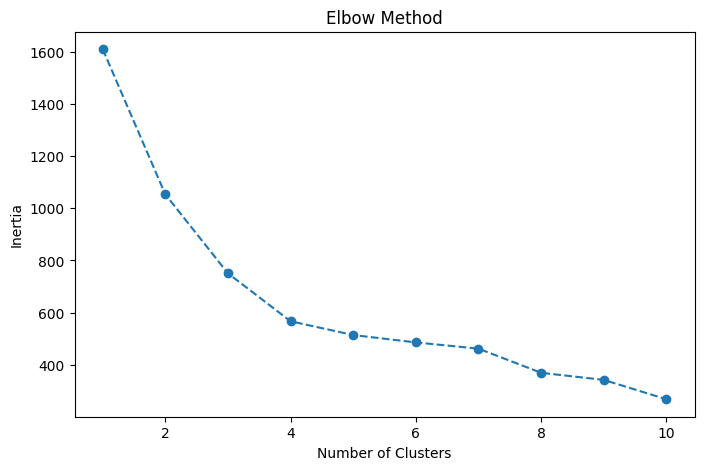

Enter the optimal number of clusters based on the Elbow plot: 4


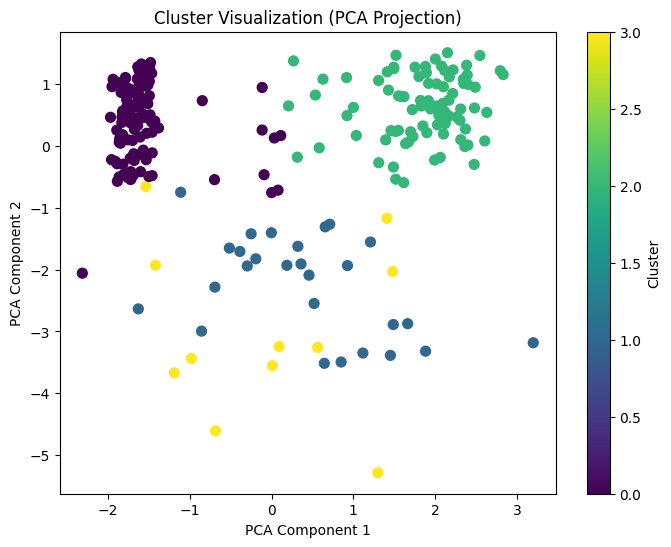

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload dataset
uploaded = files.upload()  # Choose a CSV file

# Step 2: Load the dataset
# Replace 'your_dataset.csv' with the actual filename if necessary
data = pd.read_csv(next(iter(uploaded.keys())))
print("Dataset Head:")
print(data.head())

# Step 3: Preprocess the data
# Select numerical columns for clustering
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
clustering_data = data[numerical_columns]

# Handle missing values (optional: replace with mean, median, or drop)
clustering_data.fillna(clustering_data.mean(), inplace=True)

# Standardize the data for better clustering performance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Step 4: Determine optimal number of clusters (Elbow Method)
inertia = []
range_clusters = range(1, 11)  # Try clustering with 1 to 10 clusters
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 5: Apply K-Means Clustering
optimal_clusters = int(input("Enter the optimal number of clusters based on the Elbow plot: "))
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 6: Visualize the clusters (2D projection)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title('Cluster Visualization (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 7: Save the clustered dataset
data.to_csv('clustered_dataset.csv', index=False)
files.download('clustered_dataset.csv')


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
sil_score = silhouette_score(scaled_data, data['Cluster'])
print(f"Silhouette Score for {optimal_clusters} clusters: {sil_score:.3f}")


Silhouette Score for 4 clusters: 0.507


Silhouette Score for 2 clusters: 0.403
Silhouette Score for 3 clusters: 0.472
Silhouette Score for 4 clusters: 0.507
Silhouette Score for 5 clusters: 0.411
Silhouette Score for 6 clusters: 0.394
Silhouette Score for 7 clusters: 0.392
Silhouette Score for 8 clusters: 0.400
Silhouette Score for 9 clusters: 0.408
Silhouette Score for 10 clusters: 0.389


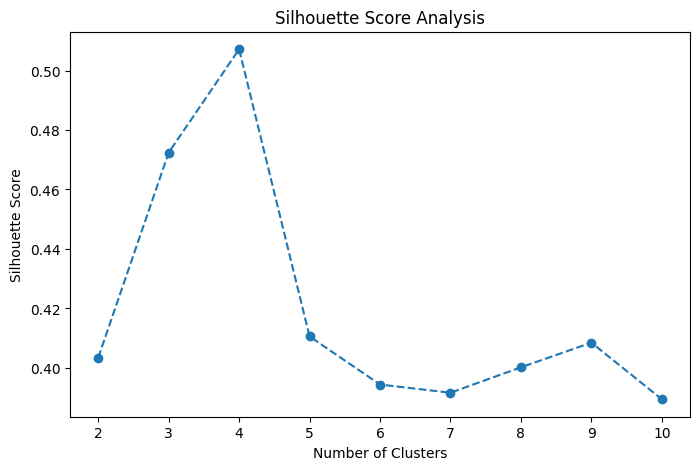

In [ ]:
silhouette_scores = []
range_clusters = range(2, 11)  # Silhouette Score is valid for 2 or more clusters

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    sil_score = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(sil_score)
    print(f"Silhouette Score for {k} clusters: {sil_score:.3f}")

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


Cluster Labels: {0, 1, 2, -1}
Silhouette Score (excluding noise): 0.662


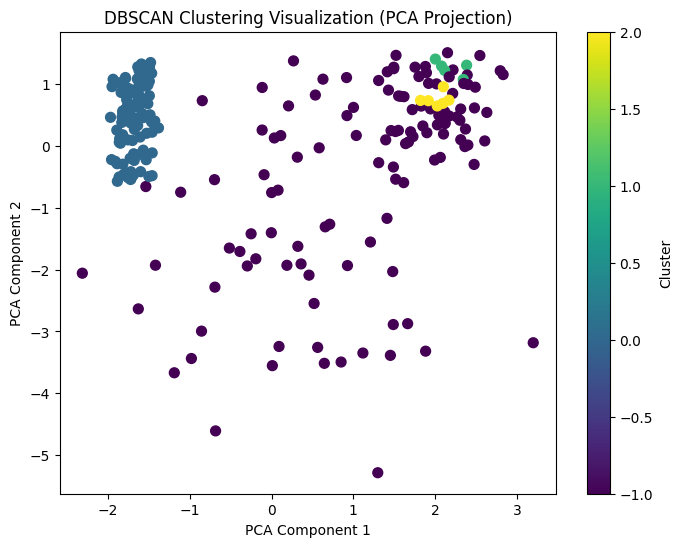

In [ ]:
from sklearn.cluster import DBSCAN
epsilon = 0.5  # Maximum distance between two samples for them to be considered in the same neighborhood
min_samples = 5  # Minimum number of points in a neighborhood to form a cluster

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
data['Cluster'] = dbscan.fit_predict(scaled_data)

# Step 5: Analyze Results
print(f"Cluster Labels: {set(data['Cluster'])}")  # Clusters (e.g., -1 indicates noise)

# Step 6: Compute Silhouette Score (ignore noise points)
if len(set(data['Cluster'])) > 1 and -1 in set(data['Cluster']):
    sil_score = silhouette_score(scal4ed_data[data['Cluster'] != -1], data['Cluster'][data['Cluster'] != -1])
    print(f"Silhouette Score (excluding noise): {sil_score:.3f}")

# Step 7: Visualize Clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering Visualization (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
